In [ ]:
!pip install webcolors

In [1]:
import glob
import numpy as np
import pandas as pd
import nltk
import re
import cld2 # detect language
import webcolors # the color dictionary
import collections # for counting bigrams from the list

from nltk.corpus import stopwords # stop word list
from nltk.stem import WordNetLemmatizer # Lemmentize words
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer # Tokenize words by space

from nltk.util import ngrams # for bigrams
from nltk.collocations import * # for bigrams
from nltk import FreqDist # for getting the most frequent words

import time
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta # for compute the date before 6 months

import matplotlib.pyplot as plt
from wordcloud import WordCloud # for wordcloud


In [2]:
nltk.download('stopwords') # for stopwords list
nltk.download('punkt') # for word tokenize
nltk.download('genesis') # for bigrams
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/Flame/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Flame/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to /Users/Flame/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package words to /Users/Flame/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Flame/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Flame/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# This is the time of the whole dataset (2 years)
start_date = '2020-6-1'# starts at 2020-6-1 00:00(included)
end_date = '2022-6-1' # ends at 2022-6-1 0:00(not included)

# This is the number of months we want to detect trends
detected_months = 6

In [4]:
# define a method to transfer date-time to timestamp
def toTimestamp(d):
    result  = time.mktime(dt.datetime.strptime(d,'%Y-%m-%d').timetuple()) 
    return int(result)

In [5]:
# list of stopwords
stopWords = list(stopwords.words('english'))

# Extend the list with your own custom stopwords
my_stopwords = [
    '699nt','absolutely','account','actually','add','ago','agree','aku','almost','already','also','always',
    'amazing','amazon','another','anyone','anything','apa','apartnment','around','ask','available','away',
    'awesome','back','bad','baru','bass','beautiful','believe','best','better','bit','boom','bought','brand',
    'break','bring','buy','call','came','can','cannot','cant','care','cause','changer','check','chef','clean',
    'click','code','come','comes','coming','comment','comments','cooking','cool','could','course','cute','dah',
    'damn','dari','day','days','definitely','die','different','discount','dollar','done','dont','dream','dude',
    'easier','easily','easy','eat','either','eneryone','enjoy','enough','even','ever','every','everyone',
    'everything','exact','exactly','excited','far','favorite','feel','finally','find','fine','first','follow',
    'food','found','free','friend','full','fun','funny','future','gadget','game','get','getting','girl','give',
    'glad','god','going','gonna','good','gorgeous','gosh','got','grab','grandma','great','guess','guna','haha','happy',
    'hate','hear','hell','hello','help','hey','high','highly','home','honestly','hont','hope','house','human',
    'husband','idea','item','job','kan','keep','kind','kitchen','kitchenware','knew','know','ladies','lady','lama',
    'last','learned','leave','let','life','like','link','list','literally','little','live','lol','look','looking',
    'looks','lot','love','made','make','making','man','mana','many','mau','may','maybe','mean','might','mine',
    'miss','mom','money','much','must','nak','name','nan','need','needs','never','new','next','nextback','nice',
    'not','nothing','oh','okay','omg','one','order','ordered','para','part','people','perfect','person','photo',
    'play','please','plus','point','post','pretty','price','probably','process','product','profile','purchase',
    'put','quality','question','ready','real','really','recommend','recommendation','remember','reply','right',
    'said','sale','save','saw','say','saying','search','second','see','seeing','seen','sell','send','sense',
    'series','share','shipping','shop','shopping','show','si','similar','sis','sold','someone','something','soon',
    'sorry','start','stay','still','stop','stuff','super','sure','take','tell','thank','thanks','thats','thing',
    'think','thinking','tho','though','thought','time','today','toko','top','tree','true','try','understand','use',
    'used','usually','video','videos','wait','waiting','want','watch','watching','way','week','weird','well',
    'went','wish','without','wonder','work','works','world','worth','would','wow','wrong','yang','yea','yeah',
    'year','yes','yet'
]
stopWords.extend(my_stopwords)

stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
# define a method to detect English text (used to remove non-English text)

def detectEnglish(str):
    try:
        isReliable, textBytesFound, details = cld2.detect(str)
        
        # including 'Unknown' - some English words or numbers might be detected as 'Unknown'
        if details[0][0] == 'ENGLISH' or details[0][0] == 'Unknown':
            return True
        else:
            return False
    except:
        return True

In [7]:
# define a method using nlp to clean the video dataframe

def cleanVideosDF(df,start_date,end_date):
    
    # Only keep videos from the start date to the end date (2 years)
    df = df[(df['video_timestamp'] >= toTimestamp(start_date)) & (df['video_timestamp'] < toTimestamp(end_date))]
    
    # in the video captions, remove all the hashtags, mentions, and web links
    df['video_desc'] = df['video_desc'].apply(lambda x: re.sub(r'#\S*', '', x))
    df['video_desc'] = df['video_desc'].apply(lambda x: re.sub(r'@\S*', '', x))
    df['video_desc'] = df['video_desc'].apply(lambda x: re.sub(r'https:\S*', '', x))
    
    # Only keep video captions which are in English
    df = df[df['video_desc'].apply(detectEnglish) == True]
    
    # join the video caption and transcript; transfer all the words to lowercase
    df['video_text'] = (df['video_desc'].map(str) + ' '+ df['video_transcript'].map(str)).astype(str).str.lower() 
    
    # Lemmatize words 
    wordnet_lem = WordNetLemmatizer()
    df['text_string'] = df['video_text'].apply(wordnet_lem.lemmatize)  
    
    # \w+ matches Unicode word characters with one or more occurrences
    # this includes most characters that can be part of a word in any language, as well as numbers and the underscore.
    regexp = RegexpTokenizer('\w+')
    
    # Tokenize - split scentenses into words
    df['text_token'] = df['text_string'].apply(regexp.tokenize)
    
    # Remove stopwords
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w not in stopWords])
    
    # Only keep English words and numbers
    en_words = set(nltk.corpus.words.words())
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w.isnumeric() or w in en_words])
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w.isnumeric() or w in en_words])
    
    # join the selected words
    df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
    
    # drop blank rows after text cleaning
    df = df.drop(df[df['text_string'] == ''].index)
    
    return df
    

In [8]:
# Import videos dataframe
videos_df = pd.read_excel("data/videos_all.xlsx")
videos_df_clean = cleanVideosDF(videos_df,start_date,end_date)

/var/folders/l5/65tjvnk92hj6x72nrm6mhb_80000gn/T/ipykernel_68969/344624633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['video_desc'] = df['video_desc'].apply(lambda x: re.sub(r'#\S*', '', x))
/var/folders/l5/65tjvnk92hj6x72nrm6mhb_80000gn/T/ipykernel_68969/344624633.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['video_desc'] = df['video_desc'].apply(lambda x: re.sub(r'@\S*', '', x))
/var/folders/l5/65tjvnk92hj6x72nrm6mhb_80000gn/T/ipykernel_68969/344624633.py:11: SettingWithCopyWarning:

In [9]:
videos_df_clean[['video_text', 'text_token', 'text_string']]

,video_text,text_token,text_string
2,bolu kukus pop ice goosebumps eyes...,"[pop, ice]",pop ice
7,"no mixer, no oven bountiful","[mixer, oven, bountiful]",mixer oven bountiful
11,reply to quick unboxing (not sponsored) i jus...,"[quick, set, took, long, quick, boxing, strugg...",quick set took long quick boxing struggle box ...
12,anyone want an unboxing? guess which color i g...,"[color, band, 3, piece, bacon, set, awhile, bl...",color band piece bacon set awhile blue taupe 1...
14,at walmart for $10 🥹🫶🏻 thanks to my hubby for ...,"[10, hubby, filing, inner, child, kitty]",hubby filing inner child kitty
...,...,...,...
10205,i have to stalk up! 🤓🥄🍴 just got home fro...,"[stalk, dialysis, commercial, travel, cutlery,...",stalk dialysis commercial travel cutlery reali...
10207,price drop no code needed nan,[drop],drop
10208,what is this? kitchen utensil is this,[utensil],utensil
10209,i support radical utensils nobody litera...,"[support, radical, nobody, change]",support radical nobody change


In [10]:
# define a method using nlp to clean the comment dataframe
def cleanCommentsDF(df,start_date,end_date):
    
    df = df[(df['comment_timestamp'] >= toTimestamp(start_date)) & (df['comment_timestamp'] < toTimestamp(end_date))]
    
    # Only keep comment texts which are in English
    df = df[df['comment_text'].apply(detectEnglish) == True]
    
    # transfer all the words to lowercase
    df['comment_text'] = df['comment_text'].astype(str).str.lower() 
       
    # in the video caption, remove all the hashtags, mentions, and web links
    df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'#\S*', '', x))
    df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'@\S*', '', x))
    df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'https:\S*', '', x))
    
    # Lemmatize words 
    wordnet_lem = WordNetLemmatizer()
    df['text_string'] = df['comment_text'].apply(wordnet_lem.lemmatize)  
    
    # \w+ matches Unicode word characters with one or more occurrences
    # this includes most characters that can be part of a word in any language, as well as numbers and the underscore.
    regexp = RegexpTokenizer('\w+')
    
    # Tokenize - split scentenses into words
    df['text_token']=df['text_string'].apply(regexp.tokenize)
    
    # Remove stopwords
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w not in stopWords])
    
    # Only keep English words and numbers
    en_words = set(nltk.corpus.words.words())
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w.isnumeric() or w in en_words])
    df['text_token'] = df['text_token'].apply(lambda x: [w for w in x if w.isnumeric() or w in en_words])
    
    # join the selected words
    df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
    
    # drop blank rows after text cleaning
    df = df.drop(df[df['text_string'] == ''].index)

    return df
    

In [11]:
# Import file 
files = glob.glob(r'data/comments/*.xlsx')
files.sort()
files


['data/comments/01_comments_kitgad_30k.xlsx',
 'data/comments/02_comments_cookware_1.xlsx',
 'data/comments/02_comments_cookware_2.xlsx',
 'data/comments/03_comments_kitware_115k.xlsx',
 'data/comments/04_comments_kitchensupplies_2k.xlsx',
 'data/comments/05_comments_kit_org_200k.xlsx',
 'data/comments/06_comments_kitchenproducts_2k.xlsx',
 'data/comments/07_comments_kitgoods_2k.xlsx',
 'data/comments/08_comments_kitchentool_60k.xlsx',
 'data/comments/09_comments_kitessentials_9k.xlsx',
 'data/comments/10_comments_kitmusthaves_23k.xlsx',
 'data/comments/11_comments_kitchendesign_156k.xlsx',
 'data/comments/12_comments_bakingset_665.xlsx',
 'data/comments/13_comments_utensils_19k.xlsx']

In [12]:
# clean each comment file and concat all the results together to one dataframe

for i, file in enumerate(files):
    df_sub = pd.read_excel(file)
    df_sub_clean = cleanCommentsDF(df_sub,start_date, end_date)
    
    if i == 0:
        comments_df_clean = df_sub_clean
    else:
        comments_df_clean = pd.concat([comments_df_clean, df_sub_clean], ignore_index=True)
    

In [13]:
comments_df_clean[['comment_text', 'text_token', 'text_string']]

,comment_text,text_token,text_string
0,i'm running in circles!!! where do i run to????,"[running, run]",running run
1,the fact that there was still some egg on the ...,"[fact, egg, plate]",fact egg plate
2,the caption 😭 sounds like a 1950s ad,"[caption, ad]",caption
3,"why didn’t you poured all the egg , it’s bothe...",[egg],egg
4,every woman's dream? y'all ain't dreaming right!,[woman],woman
...,...,...,...
243570,girl not the starbucks cup 🤣🤣🤣,[cup],cup
243571,bro yes this is absolutely genius,[genius],genius
243572,fun fork facts,[fork],fork
243573,reply to fun fork facts are back!,[fork],fork


In [14]:
# Only keep the time and text parts of the dataframes

videos_df_clean2 = videos_df_clean[['video_timestamp', 'text_token', 'text_string']]
videos_df_clean2 = videos_df_clean2.rename(columns={'video_timestamp':'timestamp'})

comments_df_clean2 = comments_df_clean[['comment_timestamp', 'text_token', 'text_string']]
comments_df_clean2 = comments_df_clean2.rename(columns={'comment_timestamp':'timestamp'})

# concat videos and comments texts
df_clean = pd.concat([videos_df_clean2,comments_df_clean2], ignore_index=True)
df_clean

,timestamp,text_token,text_string
0,1604060835,"[pop, ice]",pop ice
1,1604577038,"[mixer, oven, bountiful]",mixer oven bountiful
2,1626273617,"[quick, set, took, long, quick, boxing, strugg...",quick set took long quick boxing struggle box ...
3,1625858405,"[color, band, 3, piece, bacon, set, awhile, bl...",color band piece bacon set awhile blue taupe 1...
4,1648524782,"[10, hubby, filing, inner, child, kitty]",hubby filing inner child kitty
...,...,...,...
249839,1618339109,[cup],cup
249840,1618356014,[genius],genius
249841,1643839683,[fork],fork
249842,1643840422,[fork],fork


In [15]:
# save video data frame to trace back the video links for trend analysis

# left join the original dataframe with the cleaned dataframe, make sure all the videos are included
# so later we can use the comments dataframe to trace back the video by video id, as well as check if the bigrams are mentioned in the video text.
ref_videos_df = pd.merge(videos_df[['video_id','video_timestamp','likes_count','comments_count','video_url','video_desc','video_transcript']], videos_df_clean[['video_id','text_string']], on="video_id", how='left')

# transfer long numbers to string type
ref_videos_df = ref_videos_df.astype({'video_id': str})

# transfer timestamp to yeat-month format, add them to a new column 'month'
ref_videos_df['month'] = ref_videos_df['video_timestamp'].apply(lambda x: datetime.fromtimestamp(x).date().isoformat())
ref_videos_df['month'] = pd.to_datetime(ref_videos_df['month']).dt.strftime('%Y-%m')
        
ref_videos_df.to_excel('data/videos_all_clean.xlsx', index=False)


In [16]:
# save comments data frame to trace back the video links for trend analysis

# transfer long numbers to string type
comments_df_clean = comments_df_clean.astype({'c_video_id': str, 'comment_id':str})

# transfer timestamp to yeat-month format, add them to a new column 'month'
comments_df_clean['month'] = comments_df_clean['comment_timestamp'].apply(lambda x: datetime.fromtimestamp(x).date().isoformat())
comments_df_clean['month'] = pd.to_datetime(comments_df_clean['month']).dt.strftime('%Y-%m')
        
comments_df_clean.to_excel('data/comments_all_clean.xlsx', index=False)

In [18]:
# define a method to get the start date of detecting trends (6 months before the end date of the whole dataset)

def getDetectedDateStarts(end_date,detected_months):
    date_obj = datetime.strptime(end_date, '%Y-%m-%d')
    detected_date_starts = date_obj + relativedelta(months=-detected_months)
    detected_date_starts = detected_date_starts.strftime('%Y-%m-%d')
    
    return detected_date_starts

In [19]:
# get the dataframe for the specific period (the recent 6 months)

def getStatDf(df, end_date, detected_months):
    start_date = getDetectedDateStarts(end_date,detected_months)
    df = df[(df['timestamp'] >= toTimestamp(start_date)) & (df['timestamp'] < toTimestamp(end_date))]
    return df

In [20]:
# create a dataframe used to count the most frequent bigrams in the recent 6 months
df_stat = getStatDf(df_clean, end_date, detected_months)
df_stat

,timestamp,text_token,text_string
4,1648524782,"[10, hubby, filing, inner, child, kitty]",hubby filing inner child kitty
5,1643687004,"[old, stock, beauty, boxing, forget]",old stock beauty boxing forget
11,1651131146,[round],round
12,1649087271,"[song, contents]",song contents
13,1644027332,"[baking, set]",baking set
...,...,...,...
249813,1652976732,[genius],genius
249814,1653351481,"[bien, bien]",bien bien
249841,1643839683,[fork],fork
249842,1643840422,[fork],fork


In [21]:
# join all words
all_words = ' '.join([word for word in df_stat['text_string'] ] )

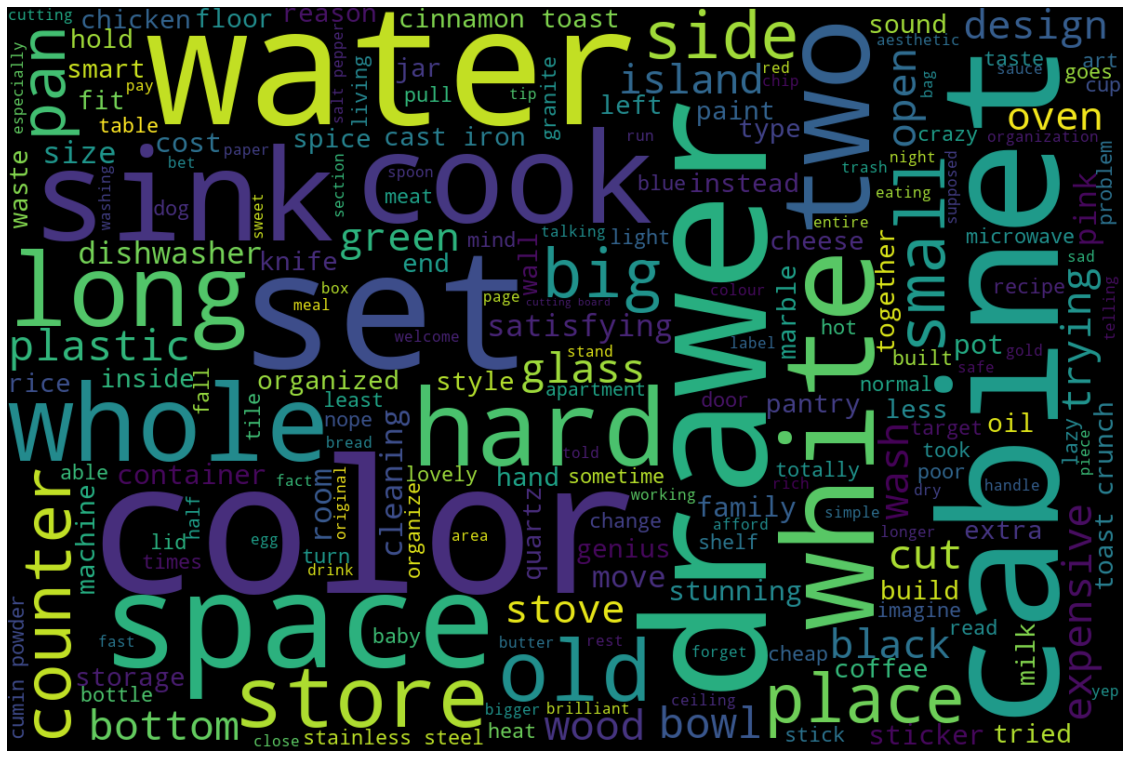

In [22]:
# make a wordcloud of the frequent words 
wordcloud = WordCloud(width=1200, 
                     height=800, 
                     random_state=3, 
                     max_font_size=200).generate(all_words)

plt.figure(figsize=(20, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [23]:
# Define a method to get most frequent bigrams
def getBigrams(df, no_of_bigrams):
    all_bigrams_l = []
    for strings in df['text_string']:
        # split the words
        tokens = strings.split(' ')
        if len(tokens) >= 2:
            bigrams = list(ngrams(tokens,2))
            for bigram in bigrams:
                all_bigrams_l.append(bigram)
    
    # join the bigram words
    for i, (a,b) in enumerate(all_bigrams_l):
        all_bigrams_l[i] = a + ' ' + b
    
    # get the most ferquent n bigrams 
    bigram_l = collections.Counter(all_bigrams_l).most_common(no_of_bigrams)
    
    for i, (a,b) in enumerate(bigram_l):
        bigram_l[i] = a
    
    return bigram_l

In [24]:
# set a number of the most frequent bigrams
no_of_bigrams =40

# get bigram list
bigram_l = getBigrams(df_stat, no_of_bigrams)
bigram_l

['cinnamon toast',
 'cast iron',
 'toast crunch',
 'cumin powder',
 'stainless steel',
 'salt pepper',
 'cutting board',
 'paper towel',
 'non stick',
 'ice cream',
 'spice rack',
 'vacuum sealer',
 'wood burning',
 'rice dispenser',
 'baking soda',
 'crunch seasoning',
 'air fryer',
 'olive oil',
 'empty space',
 'counter tops',
 'expiration date',
 'spice cabinet',
 'corner cabinet',
 'hot water',
 'boiling water',
 'crunch spice',
 'classic vintage',
 'useful tool',
 'scrub daddy',
 'custom wood',
 'carbon steel',
 'dutch oven',
 'garlic powder',
 'potato salad',
 'pot filler',
 'drying rack',
 'cheese grater',
 'dining room',
 'butcher block',
 'meal prep']

In [25]:
# define a method to return a dataframe that can be used for trend analysis

def getBigramDF(df, bigram_l):
    v_dates_l = []
    v_bigrams_l = []
    
    for i,string in enumerate(df['text_string']):
        for w in bigram_l:
            if w in re.findall(w, string):
                v_dates_l.append(df['timestamp'][i])
                v_bigrams_l.append(w)
                
    df_bigram = pd.DataFrame(list(zip(v_dates_l, v_bigrams_l)),columns = ['month', 'bigram'])
    
    df_bigram['month'] = df_bigram['month'].apply(lambda x: datetime.fromtimestamp(x).date().isoformat())
    df_bigram['month'] = pd.to_datetime(df_bigram['month']).dt.strftime('%Y-%m')
        
    return df_bigram
    

In [26]:
# get the time and bigram dataframe and save it for trend analysis
df_bigram = getBigramDF(df_clean, bigram_l)
df_bigram.to_excel('data/bigrams_for_trend_analysis.xlsx', index=False) # for trend detection

### Get Frequent Colors and their bigrams

In [27]:
tokenized_words = all_words.split(' ')

In [28]:
# Calaulate the frequency of each word
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'water': 1452, 'white': 1253, 'cabinet': 1181, 'color': 1161, 'space': 1133, 'store': 1012, 'set': 941, 'sink': 894, 'spice': 809, 'cook': 786, ...})

In [29]:
# defind a method to get the most frequent n colors
def getFreqColors(fdist,no_of_colors):
    freq_l = dict(fdist)
    freq_l = sorted(freq_l.items(), key=lambda x: x[1], reverse=True)
    color_freq_l = []
    i=0
    while(len(color_freq_l) < no_of_colors):
        if freq_l[i][0] in webcolors.CSS3_NAMES_TO_HEX:
            color_freq_l.append(freq_l[i][0])
        i+=1
    return color_freq_l

In [30]:
no_of_colors = 15
freq_colors_l = getFreqColors(fdist,no_of_colors)
freq_colors_l

['white',
 'black',
 'green',
 'blue',
 'pink',
 'gold',
 'brown',
 'red',
 'yellow',
 'grey',
 'chocolate',
 'olive',
 'purple',
 'orange',
 'gray']

In [31]:
# define a method to get color bigrams of a specific color
def getColorBigrams(df, color_name, no_of_bigrams):
    # get all bigrams
    all_bigrams_l = []
    for strings in df['text_string']:
        tokens = strings.split(' ')
        if len(tokens) >= 2:
            bigrams = list(ngrams(tokens,2))
            for bigram in bigrams:
                all_bigrams_l.append(bigram)
            
    # Only keep bigrams contains the color
    all_bigrams_l = [(w1, w2) for w1,w2 in all_bigrams_l if color_name in (w1, w2) ]
    
    # some bigrams might conatins two colors such as 'black white'
    # remove the bigrams that both words are colors
    all_bigrams_l_new = []
    for a,b in all_bigrams_l:
        if a in webcolors.CSS3_NAMES_TO_HEX and b in webcolors.CSS3_NAMES_TO_HEX:
            pass
        else:
            all_bigrams_l_new.append((a,b))
    
    # join the bigram words
    for i, (a,b) in enumerate(all_bigrams_l_new):
        all_bigrams_l_new[i] = a + ' ' + b
    
    # get the most frequent n bigrams
    bigram_l = collections.Counter(all_bigrams_l_new).most_common(no_of_bigrams)
    
    for i, (a,b) in enumerate(bigram_l):
        bigram_l[i] = a
    
    return bigram_l

In [32]:
color_name = 'yellow' # you can set any color from the frequent color list
no_of_bigrams = 20

bigram_colors_l = getColorBigrams(df_stat, color_name, no_of_bigrams)
bigram_colors_l

['butter yellow',
 'yellow basket',
 'yellow butter',
 'bright yellow',
 'yellow heat',
 'turn yellow',
 'yellow toaster',
 'colour yellow',
 'yellow bowl',
 'turning yellow',
 'bear yellow',
 'lemon yellow',
 'yellow handle',
 'yellow colour',
 'color yellow',
 'yellow hard',
 'yellow car',
 'quartz yellow',
 'bag yellow',
 'yellow pumpkin']

In [33]:
# pick color bigrams from the list above and make your own list of color bigrams
color_bigram_l = [
    'red chopper', 'black glass', 'black set', 'pewter green', 'green pan', 'blue plate', 'blue steel', 'pink set', 
    'pink pan', 'gold flatware', 'gold set', 'gold handle', 'brown granite', 'yellow bowl', 'purple utensil'
]

In [34]:
# get the time and color bigram dataframe and save it for trend analysis

df_color_bigram = getBigramDF(df_clean, color_bigram_l)
df_color_bigram.to_excel('data/color_bigrams_for_trend_analysis.xlsx', index=False)

### Method of Getting Frequent Trigrams

This is the method for getting frequent trigrams.

After testing, we think the trigrams are not as useful as bigrams, so we decided to use bigrams for trend analysis.

In [35]:
# define a method to get the most frequent n trigrams
def getTrigrams(df, no_of_trigrams):
    all_trigrams_l = []
    for strings in df['text_string']:
        tokens = strings.split(' ')
        if len(tokens) >= 3:
            trigrams = list(ngrams(tokens,3))
            for trigram in trigrams:
                all_trigrams_l.append(trigram)
            
    for i, (a,b,c) in enumerate(all_trigrams_l):
        all_trigrams_l[i] = a + ' ' + b + ' ' + c
    
    trigram_l = collections.Counter(all_trigrams_l).most_common(no_of_trigrams)
    
    for i, (a,b) in enumerate(trigram_l):
        trigram_l[i] = a
    
    return trigram_l

In [36]:
# set a number of the most frequent trigrams
no_of_trigrams =20

# get trigram list
trigram_l = getTrigrams(df_stat, no_of_trigrams)
trigram_l

['cinnamon toast crunch',
 'toast crunch seasoning',
 'toast crunch spice',
 'custom wood burning',
 'paper towel holder',
 'store launch two',
 'salt pepper container',
 'kat swipe left',
 'launch store two',
 'level toasty ness',
 'salt pepper shakers',
 'non stick pan',
 'ease store gift',
 'leaving visit page',
 'forever term level',
 'term level toasty',
 '2600 3590 pacific',
 '3590 pacific 4990',
 'pacific 4990 warranty',
 'cut toe kick']